In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

In [135]:
df=pd.read_csv("superstorecleaned.csv")
df["Order.Date"]=pd.to_datetime(df["Order.Date"])
df["Ship.Date"]=pd.to_datetime(df["Ship.Date"])
print(df.shape)
df.head()

(51290, 26)


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29,CA-2011-146969,High,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40


In [ ]:
Total_sales=df["Sales"].sum()
print(Total_sales)
Total_profit=df["Profit"].sum()
print(Total_profit)
Profit_Margin=round((Total_profit/Total_sales)*100,2)
print(Profit_Margin)

12642905
1467457.2912800002
11.61


In [138]:
def add_value_labels(x, y):
    for xi, yi in zip(x, y):
        va = 'bottom' if yi >= 0 else 'top'
        label = (
            f'{yi/1_000_000:.1f}M' if abs(yi) >= 1_000_000
            else f'{yi/1_000:.1f}K' if abs(yi) >= 1_000
            else f'{yi:.0f}')
        plt.text( xi, yi, label, ha='center', va=va)
def add_pivot_value_labels(ax):
    for c in ax.containers:
        ax.bar_label(c,labels=[
            f'{v/1_000_000:.1f}M' if abs(v) >= 1_000_000
            else f'{v/1_000:.1f}K' if abs(v) >= 1_000
            else f'{v:.0f}'
            for v in c.datavalues],label_type='edge')
def format_yaxis_millions():
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M'))

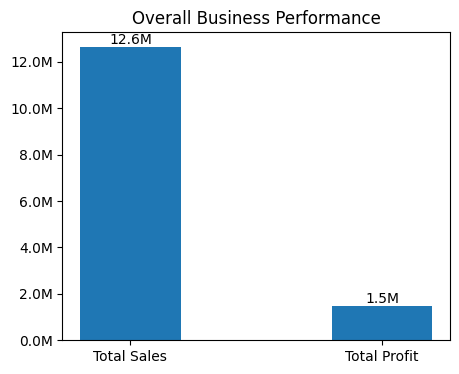

In [66]:
metrics = ['Total Sales', 'Total Profit']
values = [Total_sales, Total_profit]
x = np.arange(len(metrics))
plt.figure(figsize=(5, 4))
plt.title("Overall Business Performance")
bars = plt.bar(metrics, values, width=0.4)
add_value_labels(x, values)
format_yaxis_millions()
plt.show()

In [67]:
yearly_performance = (
    df.groupby('Year')[["Sales","Profit"]]
    .sum()
    .reset_index())
yearly_performance


,Year,Sales,Profit
0,2011,2259511,248940.81154
1,2012,2677493,307415.27910
2,2013,3405860,406935.23018
3,2014,4300041,504165.97046


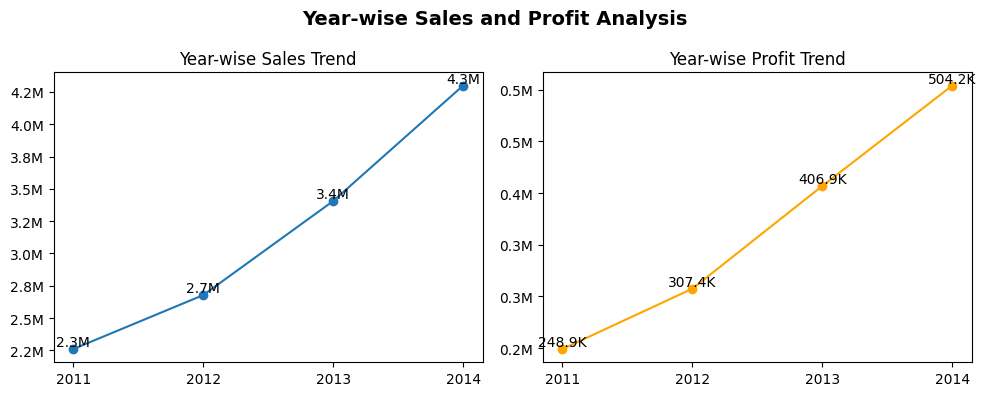

In [68]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(yearly_performance['Year'],yearly_performance['Sales'],marker='o')
plt.title('Year-wise Sales Trend')
add_value_labels(yearly_performance['Year'],yearly_performance['Sales'])
format_yaxis_millions()
plt.xticks(yearly_performance['Year'])
plt.subplot(1, 2, 2)
plt.plot(yearly_performance['Year'],yearly_performance['Profit'],marker='o',color='orange')
plt.title('Year-wise Profit Trend')
add_value_labels(yearly_performance['Year'],yearly_performance['Profit'])
format_yaxis_millions()
plt.xticks(yearly_performance['Year'])
plt.suptitle('Year-wise Sales and Profit Analysis',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

In [69]:
category_sales = (df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
                  .sort_values(by='Sales', ascending=False))

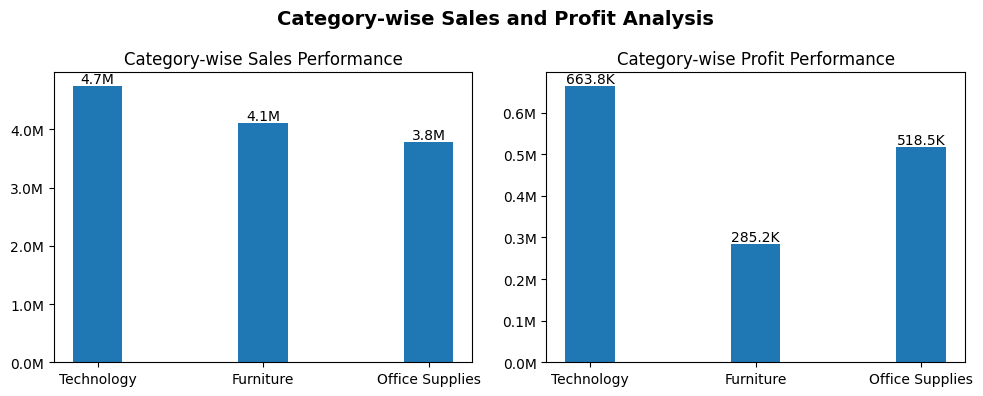

In [70]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(category_sales['Category'], category_sales['Sales'], width=0.3)
plt.title('Category-wise Sales Performance')
add_value_labels(category_sales['Category'], category_sales['Sales'])
format_yaxis_millions()
plt.subplot(1, 2, 2)
plt.bar(category_sales['Category'], category_sales['Profit'], width=0.3)
plt.title('Category-wise Profit Performance')
add_value_labels(category_sales['Category'], category_sales['Profit'])
format_yaxis_millions()
plt.suptitle('Category-wise Sales and Profit Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [71]:
subcat_sales=(df.groupby('Sub.Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False))

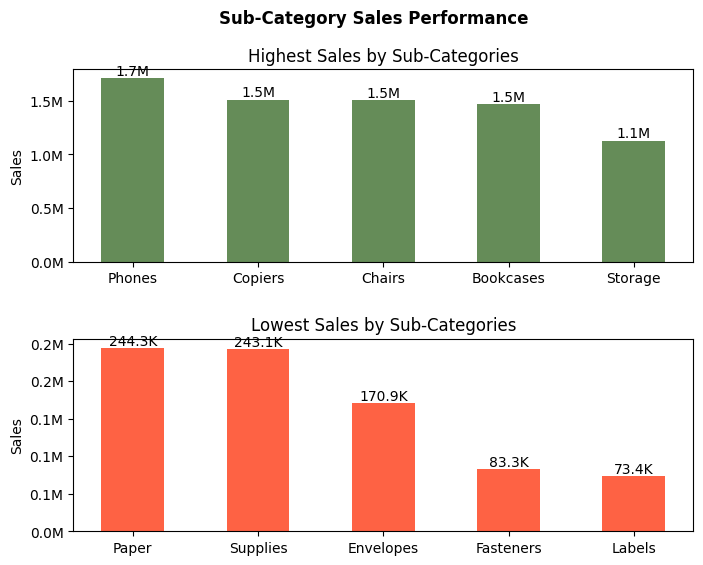

In [72]:
plt.figure(figsize=(8,6))
higher_sales_subcats=subcat_sales.head()
lower_sales_subcats=subcat_sales.tail()
plt.subplot(2,1,1)
plt.bar(higher_sales_subcats['Sub.Category'],higher_sales_subcats['Sales'],width=0.5,color='#658C58')
plt.title('Highest Sales by Sub-Categories')
format_yaxis_millions()
plt.ylabel('Sales')
add_value_labels(higher_sales_subcats['Sub.Category'],higher_sales_subcats['Sales'])
plt.subplot(2,1,2)
plt.bar(lower_sales_subcats['Sub.Category'],lower_sales_subcats['Sales'],width=0.5,color='#FE6244')
plt.title('Lowest Sales by Sub-Categories')
format_yaxis_millions()
add_value_labels(lower_sales_subcats['Sub.Category'],lower_sales_subcats['Sales'])
plt.ylabel('Sales')
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Sub-Category Sales Performance',fontweight='bold')
plt.show()

In [73]:
subcat_profit=(df.groupby('Sub.Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False))

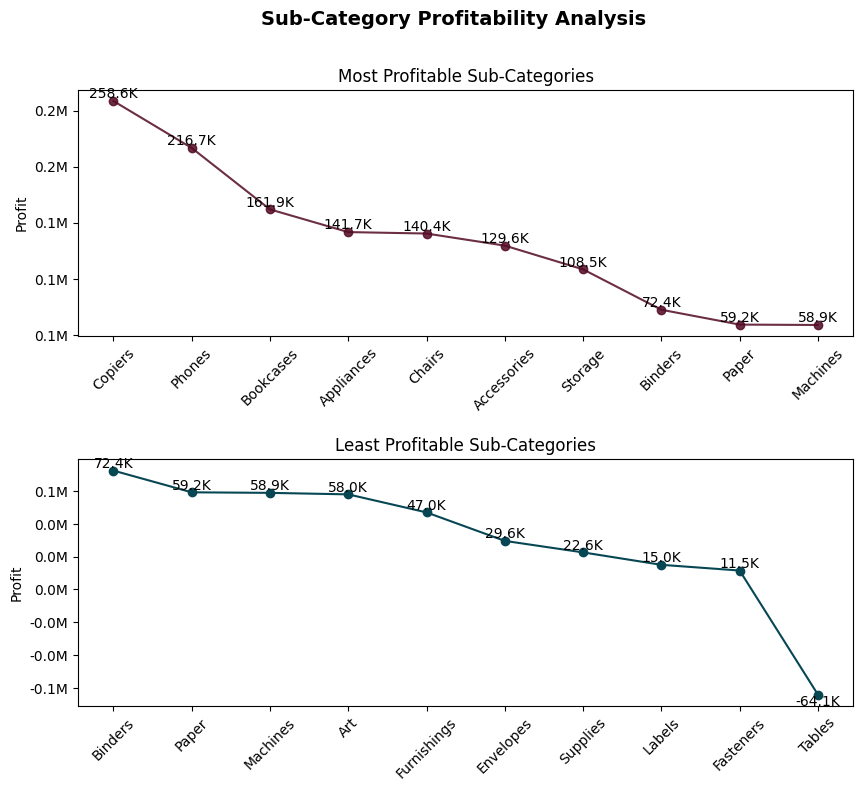

In [145]:
high_profit_subcats=subcat_profit.head(10)
loss_making_subcats=subcat_profit.tail(10)
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(high_profit_subcats['Sub.Category'],high_profit_subcats['Profit'],marker='o',color="#540C26DC")
plt.title('Most Profitable Sub-Categories')
plt.ylabel('Profit')
format_yaxis_millions()
add_value_labels(high_profit_subcats['Sub.Category'], high_profit_subcats['Profit'])
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
plt.plot(loss_making_subcats['Sub.Category'], loss_making_subcats['Profit'], marker='o',color="#074754")
plt.title('Least Profitable Sub-Categories')
plt.ylabel('Profit')
format_yaxis_millions()
add_value_labels(loss_making_subcats['Sub.Category'], loss_making_subcats['Profit'])
plt.suptitle('Sub-Category Profitability Analysis',fontsize=14, fontweight='bold')
plt.subplots_adjust(hspace=0.5)
plt.xticks(rotation=45)
plt.show()

In [134]:
Products_Sales_Profit=(df.groupby('Product.Name')[['Sales','Profit','Quantity']].sum().reset_index().sort_values(by='Sales',ascending=False))
print(Products_Sales_Profit.head())
print(Products_Sales_Profit.tail())

                               Product.Name  Sales      Profit  Quantity
310            Apple Smart Phone, Full Size  86936   5921.5786       171
970            Cisco Smart Phone, Full Size  76441  17238.5206       139
2415        Motorola Smart Phone, Full Size  73159  17027.1130       134
2501           Nokia Smart Phone, Full Size  71904   9938.1955       147
866   Canon imageCLASS 2200 Advanced Copier  61600  25199.9280        20
                                           Product.Name  Sales  Profit  \
438   Avery Hi-Liter Pen Style Six-Color Fluorescent...      8  3.1570   
1641                                Grip Seal Envelopes      7  2.3868   
3707                                           Xerox 20      6  3.1104   
373                                             Avery 5      6  2.8224   
1368  Eureka Disposable Bags for Sanitaire Vibra Gro...      2 -4.4660   

      Quantity  
438          2  
1641         2  
3707         1  
373          2  
1368         2  


In [76]:
Region_Sales_Profit=(df.groupby('Region')[['Sales','Profit']].sum().reset_index().sort_values(by='Sales',ascending=False))

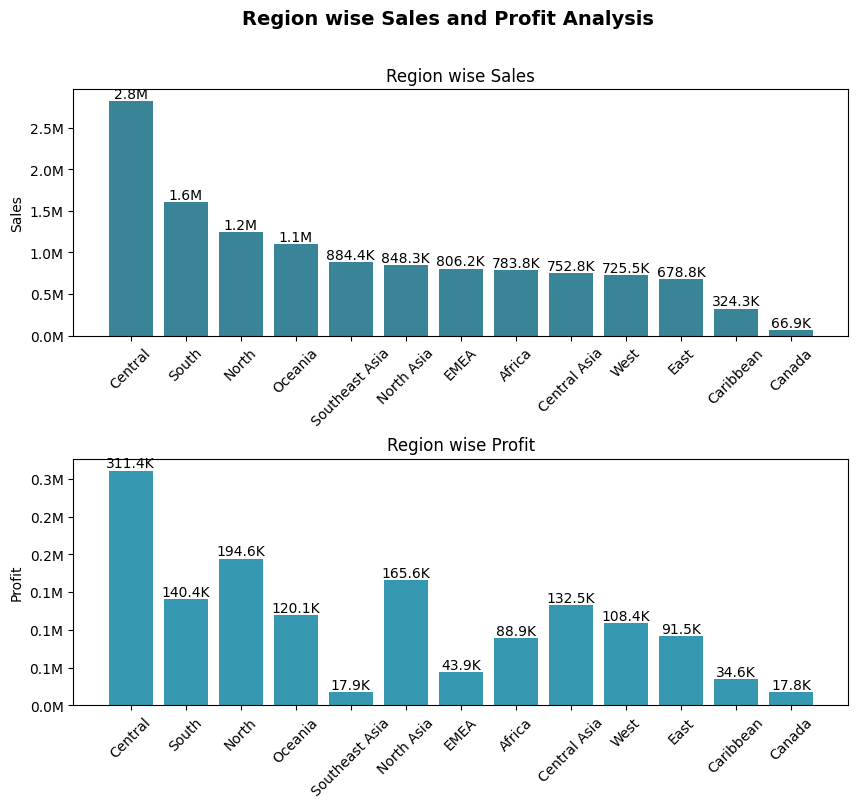

In [150]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.bar(Region_Sales_Profit['Region'],Region_Sales_Profit['Sales'],color="#398497")
plt.title('Region wise Sales')
format_yaxis_millions()
plt.xticks(rotation=45)
plt.ylabel('Sales')
add_value_labels(Region_Sales_Profit['Region'],Region_Sales_Profit['Sales'])
plt.subplot(2,1,2)
plt.bar(Region_Sales_Profit['Region'],Region_Sales_Profit['Profit'],color="#3598B0")
plt.title('Region wise Profit')
plt.xticks(rotation=45)
plt.ylabel('Profit')
format_yaxis_millions()
plt.subplots_adjust(hspace=0.5)
add_value_labels(Region_Sales_Profit['Region'],Region_Sales_Profit['Profit'])
plt.suptitle('Region wise Sales and Profit Analysis',fontsize=14,fontweight='bold')
plt.show()

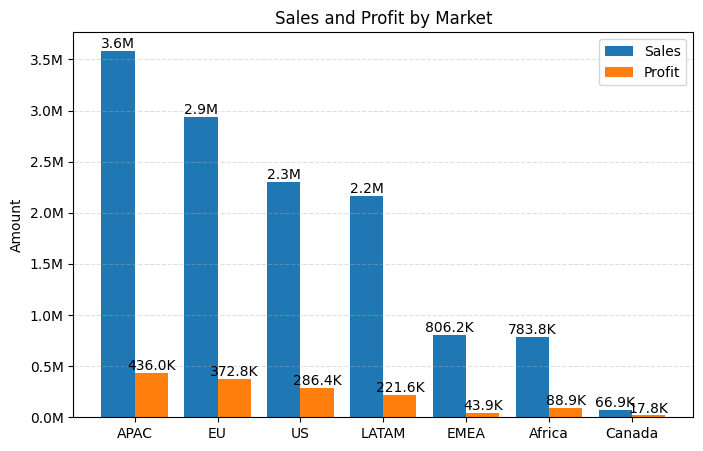

In [163]:
market_perf = (df.groupby('Market')[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales',ascending=False))
markets = market_perf['Market']
sales = market_perf['Sales']
profit = market_perf['Profit']
x = np.arange(len(markets))  
width = 0.4               
plt.figure(figsize=(8,5))
plt.bar(x - width/2, sales, width, label='Sales')
plt.bar(x + width/2, profit, width, label='Profit')
plt.xticks(x, markets)
plt.title('Sales and Profit by Market')
plt.ylabel('Amount')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
format_yaxis_millions()
add_value_labels(x-width/2,sales)
add_value_labels(x+width/2,profit)
plt.show()

In [78]:
discount_average=df['Discount'].mean()
print(discount_average)
discount_percentage = discount_average * 100
print(f"{discount_percentage:.2f}%")

0.14290754533047376
14.29%


In [166]:
df['Discount_Band'] = pd.cut(df['Discount'], bins=[0, 0.10, 0.20, 0.30, 0.50, df['Discount'].max()],
                             labels=['0-10%', '10-20%', '20-30%', '30-50%', '50%+'],)

In [167]:
sales_discount = (df.groupby('Discount_Band',observed=True)['Sales'].sum().reset_index())
print(sales_discount)
profit_discount = (df.groupby('Discount_Band', observed=True)['Profit'].sum().reset_index())
print(profit_discount)

  Discount_Band    Sales
0         0-10%  1962633
1        10-20%  1757296
2        20-30%   382540
3        30-50%  1176078
4          50%+   371624
  Discount_Band        Profit
0         0-10%  338189.26138
1        10-20%  173254.84340
2        20-30%  -21155.61312
3        30-50% -380944.81582
4          50%+ -412581.65776


In [168]:
discount_summary = (df.groupby('Discount_Band',observed=True)[['Sales', 'Profit']].sum().reset_index())
discount_summary['Profit_Margin'] = (discount_summary['Profit'] / discount_summary['Sales']) * 100

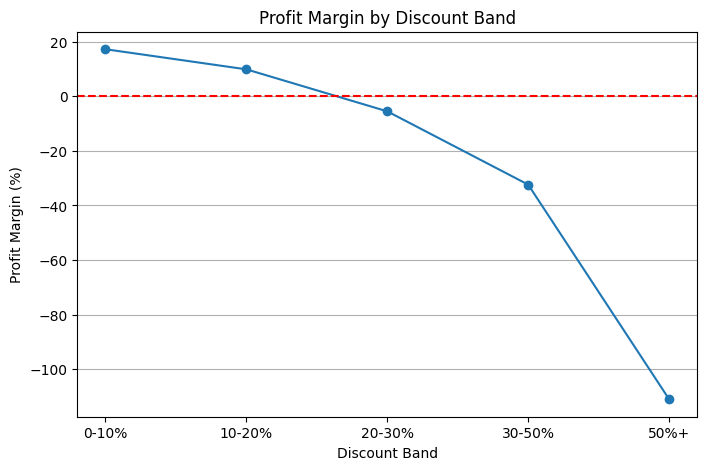

In [112]:
plt.figure(figsize=(8, 5))
plt.plot(discount_summary['Discount_Band'],discount_summary['Profit_Margin'],marker='o')
plt.title('Profit Margin by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Profit Margin (%)')
plt.axhline(0, linestyle='--',color='red')  # zero-profit reference
plt.grid(axis='y')
plt.show()


In [169]:
category_discount = ( df.groupby(['Discount_Band', 'Category'], observed=True)['Profit'].sum().unstack())

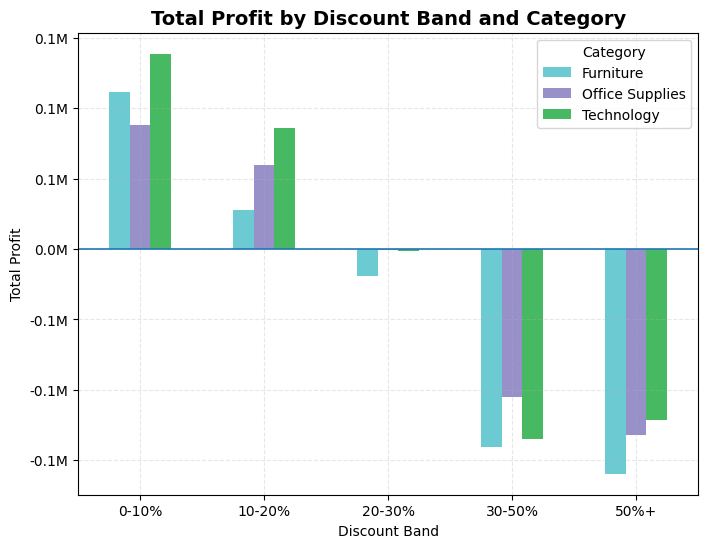

In [83]:
category_discount.plot(kind='bar',figsize=(8,6),color=["#6CCAD3", "#9890C9", "#47B962"])
plt.xlabel('Discount Band')
plt.ylabel('Total Profit')
plt.title('Total Profit by Discount Band and Category',fontsize=14,fontweight='bold')
plt.axhline(0,linewidth=1.2)
format_yaxis_millions()
plt.xticks(rotation=0)
plt.grid(linestyle='--',alpha=0.3)
plt.show()

In [84]:
subcat_discount = ( df.groupby(['Sub.Category', 'Discount_Band'], observed=True)
                   .agg(Total_Sales=('Sales', 'sum'),Total_Profit=('Profit', 'sum'))
                   .reset_index().sort_values(by='Total_Profit',ascending=False))
subcat_discount

,Sub.Category,Discount_Band,Total_Sales,Total_Profit
27,Copiers,0-10%,466280,92327.22698
17,Bookcases,0-10%,342936,57455.99940
22,Chairs,0-10%,306047,49143.10890
63,Storage,0-10%,259814,38740.85700
59,Phones,10-20%,357267,37015.88090
...,...,...,...,...
61,Phones,30-50%,140617,-45203.00840
16,Binders,50%+,42030,-45221.29540
20,Bookcases,30-50%,159468,-49116.31130
74,Tables,30-50%,173360,-55554.26980


In [85]:
Avg_shipping_cost=round(df['Shipping.Cost'].mean(),2)
Avg_shipping_cost

np.float64(26.38)

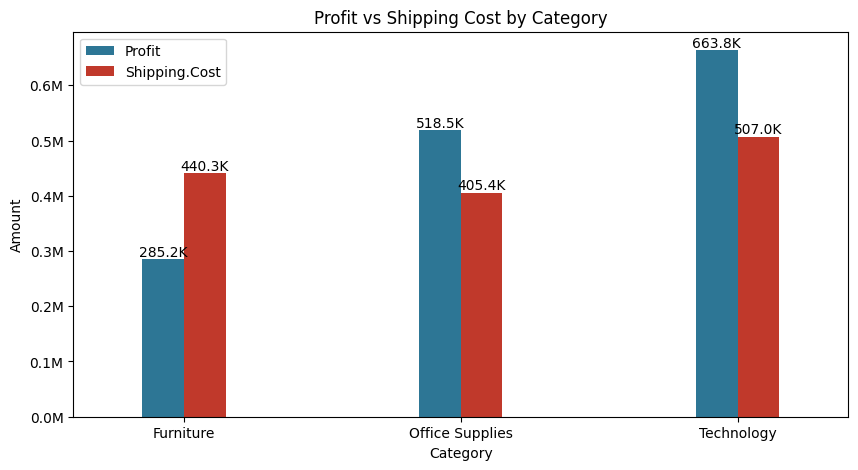

In [155]:
category_shipping_profit = (df.groupby('Category')[['Profit', 'Shipping.Cost']].sum().reset_index())
pivot_table1 = category_shipping_profit.pivot_table(index='Category',values=['Profit', 'Shipping.Cost'],aggfunc='sum')
ax = pivot_table1.plot(kind='bar', figsize=(10,5),width=0.3,color={'Profit': "#2D7695",'Shipping.Cost': '#C0392B'})
plt.title('Profit vs Shipping Cost by Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
format_yaxis_millions()
add_pivot_value_labels(ax)
plt.show()

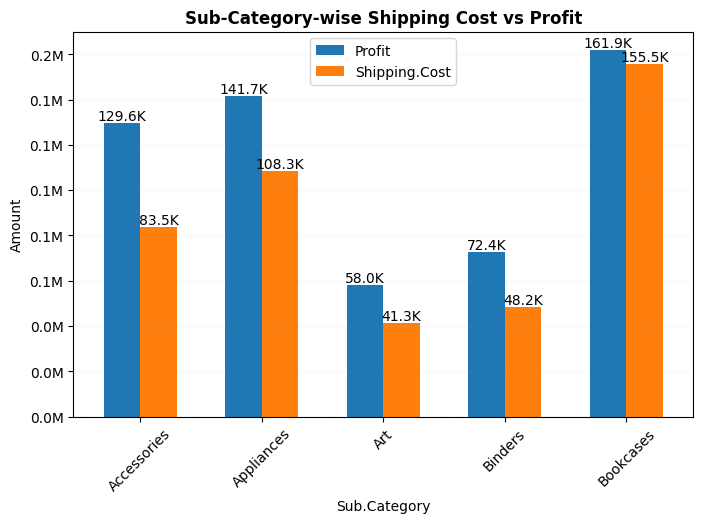

In [87]:
# Pivot table instead of manual grouping + bar positions
pivot_subcat = (df.pivot_table(index='Sub.Category',values=['Profit', 'Shipping.Cost'],aggfunc='sum').head())
ax = pivot_subcat.plot(kind='bar', figsize=(8,5),width=0.6)
plt.title('Sub-Category-wise Shipping Cost vs Profit', fontweight='bold')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
format_yaxis_millions()
add_pivot_value_labels(ax)
plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.show()

In [161]:
order_counts = (df.groupby(['Category', 'Ship.Mode'])  .size()  .reset_index(name='Order_Count'))
pivot_table = order_counts.pivot(index='Category',columns='Ship.Mode',values='Order_Count')
pivot_table

Ship.Mode,First Class,Same Day,Second Class,Standard Class
Category,,,,
Furniture,1431,508,1968,5969
Office Supplies,4598,1675,6311,18689
Technology,1476,518,2030,6117


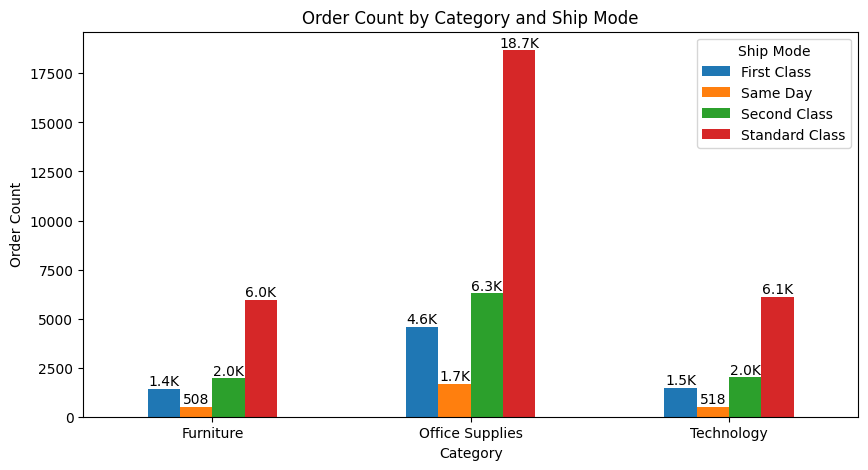

In [89]:
ax=pivot_table.plot(kind='bar',figsize=(10,5))
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.title('Order Count by Category and Ship Mode')
plt.xticks(rotation=0)
plt.legend(title='Ship Mode')
add_pivot_value_labels(ax)
plt.show()

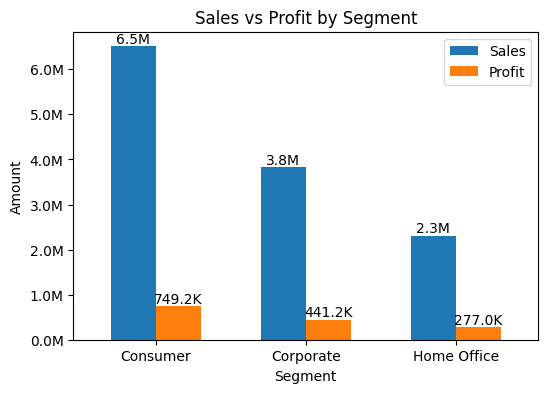

In [90]:
segment_profit_sales = (df.groupby('Segment')[['Profit','Sales']].sum().reset_index())
pivot_segment = segment_profit_sales.set_index('Segment')[['Sales','Profit']]
ax=pivot_segment.plot(kind='bar', figsize=(6,4),width=0.6)
plt.title('Sales vs Profit by Segment')
plt.ylabel('Amount')
format_yaxis_millions()
plt.xticks(rotation=0)
format_yaxis_millions()
add_pivot_value_labels(ax)
plt.show()

## **Final Business Summary & Actionable Insights**

**Key Metrics**
- Total Revenue: **12.6M**
- Total Profit: **1.5M**
- Overall Profit Margin: **11.61%**
- Average Discount:**14.29%**
- Average Shipping Cost:**26.38**
- Highest Revenue Product: **Apple Smart Phone, Full Size**


### Overall Performance
Sales show a consistent upward trend over time, indicating strong demand. However, profit growth has not increased at the same pace as sales, suggesting margin pressure driven by pricing strategies and cost factors.

### Impact of Discounts on Profitability
The analysis shows a clear negative relationship between discount levels and profit. While discounts contribute to higher sales volume, profitability declines sharply beyond a certain point.  
Based on the observed trend, discounts above approximately **20%** consistently lead to significantly lower or negative profit, making aggressive discounting unsustainable.

This discount–profit pattern remains consistent across product categories, regions, and customer segments, indicating a structural pricing issue rather than a localized problem.

### Category & Sub-Category Insights
A limited number of categories and sub-categories contribute the majority of total profit. At the same time, several sub-categories generate high sales but low or negative profit, indicating inefficiencies that require pricing or cost optimization.

---

### Key Business Risks
1. **Margin erosion due to over-discounting:**  
   Excessive discounts increase sales volume but significantly reduce profit margins, threatening long-term profitability.

2. **High dependence on few profit-driving categories:**  
   Profit concentration in a small number of categories increases business risk if demand shifts or costs rise in these areas.

---

### Recommendations & Expected Impact
- **Cap discounts at approximately 30%** to protect margins while maintaining stable sales performance.
- **Review loss-making sub-categories** for pricing adjustments, cost optimization, or strategic discontinuation to improve overall profitability.
- **Shift performance focus from sales volume to profit margin**, ensuring sustainable and profitable growth.

---


